In [1]:
using GraphRecipes
using Plots
using DelimitedFiles
using LinearAlgebra
using SparseArrays
using Random
Random.seed!(1234);  # determinism
plot([1], [1]);      # pre-compile some code

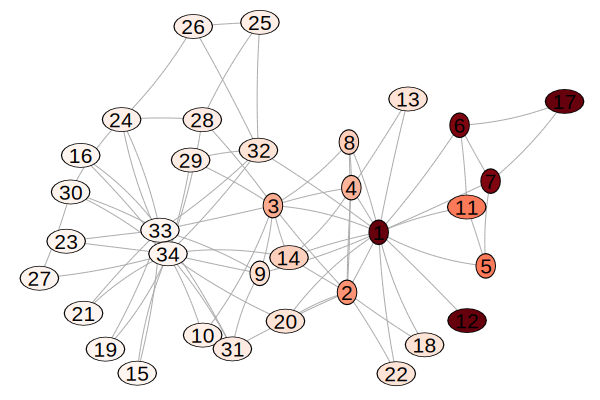

In [2]:
# ZGL SSL for ZKC
data = readdlm("zacharys-KC.txt")
n = 34
A = sparse(convert(Vector{Int64}, data[:,1]),
           convert(Vector{Int64}, data[:,2]), 1, n, n)
A = max.(A, A')
#labels = zeros(n)
#labels[[1,2,3,4,5,6,7,8,11,12,13,14,17,18,20,22]] .= 1
L = [1, 12, 17, 33, 34]
l = [1, 1,  1, 0,  0]
U = [v for v in 1:n if !(v in L)]

d = vec(sum(A, dims=1))
P = Matrix(A * inv(Diagonal(d)))
fU = (I - P[U, U]) \ (P[U, L] * l)

ssl_labels = zeros(n)
ssl_labels[L] = l
ssl_labels[U] = fU

Random.seed!(1345)  # plot same each time
plot(
    graphplot(A,
              method=:stress,
              marker = (:Reds, :circ),
              marker_z = ssl_labels,
              linecolor = :darkgrey,
              names = 1:n,
              markersize = 2,
             )
)

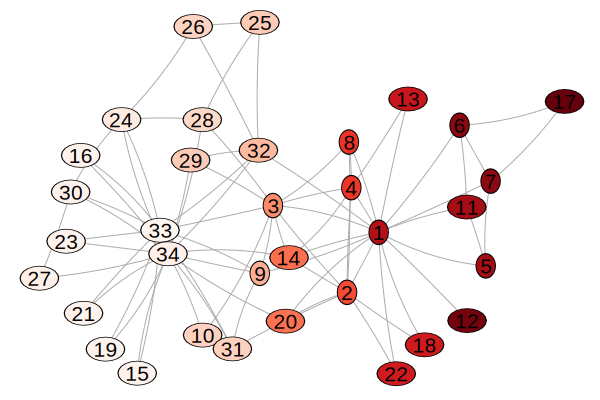

In [3]:
# Local and global consistency SSL for ZKC
Dinv = Diagonal(d .^ (-1/2))
S = Matrix(Dinv * A * Dinv)
α = 0.85
Y = zeros(n, 2)
Y[L[1:3], 1] .= 1
Y[L[4:5], 2] .= 1

F = (I - α * S) \ ((1 - α) * Y)
ssl_labels = F[:, 1] ./ sum(F, dims=2)
    
Random.seed!(1345)  # plot same each time
plot(
    graphplot(A,
              method=:stress,
              marker = (:Reds, :circ),
              marker_z = ssl_labels,
              linecolor = :darkgrey,
              names = 1:n,
              markersize = 2,
             )
)